# Avocado-Project
 Problem Statement: Avocado is a fruit consumed by people heavily in the United States.

  Content this data was downloaded from the Hass Avocado Board 
  website  in May of 2018 & compiled into a single CSV.
  
  The table represents weekly 2018  retail scan data for National
  retail volume(units) and price. Retail scan data comes directly 
  from retailers' cash registers based on actual retail sales of
  Hass avocados.
  
  Starting in 2013, the table reflects an expanded, multi-outlet 
  retail data set. Multi-outlet reporting includes an aggregation
  of the following channels: 
  grocery, mass, club, drug, dollar and military.
  The  Average Price (of avocados) in the table reflects
  a per unit(per avocado)cost, even when multiple units (avocados)
  are sold in bags.
  
  The Product Lookup codes(PLU's) in the table are only for
  Hass avocados. Other varieties of avocados(e.g. greenskins) are not
  included in this table.
  
  Some relevant columns in the dataset:
  
  Date - The date of the observation AveragePrice - the average price
  of a single avocado type - conventional or organic year - the year 
  Region-the city or region of the observation Total Volume - 
  Total number of avocados sold 4046 - Total number of avocados with
  PLU 4046 sold 4225 -Total number of avocados with PLU 4225 sold 4770
  - Total number of avocados with PLU 4770 sold.
  
  Your task is to make a model that can consider the data provided and 
  predict the Average Price.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [2]:
df=pd.read_csv('avacado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# EDA

In [3]:
df.shape

(16468, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
import seaborn as sns

<AxesSubplot:>

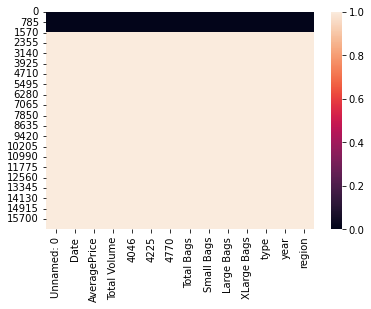

In [9]:
sns.heatmap(df.isnull())

IN THIS DATASET WE FIND MOST OF ALL VARIABLES CONTAIN NULL DATA WHICH SHOULD BE REMOVED AS FILLING THEM WILL AFFECT THE MODEL PREDICTION 

# CHECKING FOR DUPLICATES AND REMOVING THEM

In [10]:
df['Unnamed: 0'].duplicated().sum()

16415

In [11]:
df['Date'].duplicated().sum()

16363

In [12]:
df['AveragePrice'].duplicated().sum()

16354

In [13]:
df['Total Volume'].duplicated().sum()

14950

In [14]:
df['4046'].duplicated().sum()

14950

In [15]:
df['4225'].duplicated().sum()

14950

In [16]:
df['4770'].duplicated().sum()

14951

In [17]:
df['type'].duplicated().sum()

16466

In [18]:
df1=df.drop_duplicates(keep=False)

In [19]:
df.shape

(16468, 14)

In [20]:
df1.shape

(1517, 14)

In [21]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [22]:
df1.shape

(1517, 14)

In [23]:
df1.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

# CONVERTING OBJECT DATATYPE  INTO THE SAME DATATYPE OF OTHERS

In [24]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [25]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))   

In [26]:
df1.dtypes

Unnamed: 0      float64
Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year            float64
region          float64
dtype: object

In [27]:
df1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [28]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,92.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015.0,0.0
1,1.0,68.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015.0,0.0
2,2.0,44.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015.0,0.0
3,3.0,20.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015.0,0.0
4,4.0,98.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015.0,0.0


<AxesSubplot:>

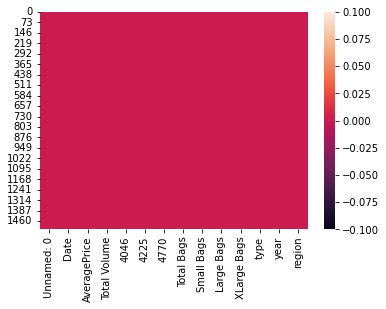

In [29]:
sns.heatmap(df1.isnull())

# DATA VISUALIZATION

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Date            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Small Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
type               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
year               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
region             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

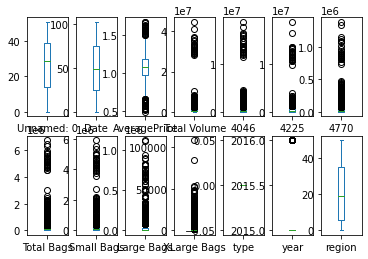

In [31]:
df1.plot(kind='box',subplots=True,layout=(2,7))

The above graph show a general view of the variables 

<AxesSubplot:xlabel='Date', ylabel='Count'>

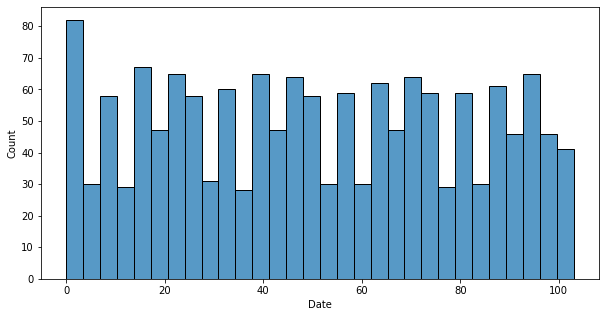

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df1['Date'], bins=30)

THE ABOVE SHOWS THE PRICE RANGE OF THE FRUIT THROUGHOUT THE MONTH 

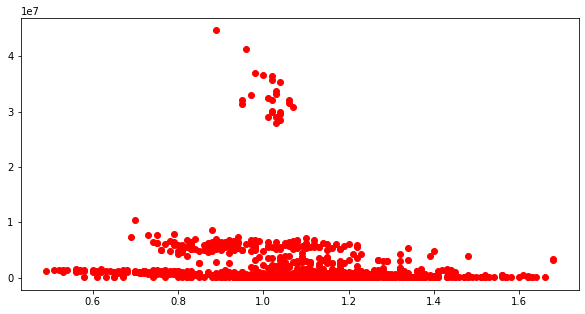

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df1['AveragePrice'],df1['Total Volume'],c='Red')

PRICE IS SYMMETRICAL TO TOTAL VOLUME ALONG WITH OUTLIERS

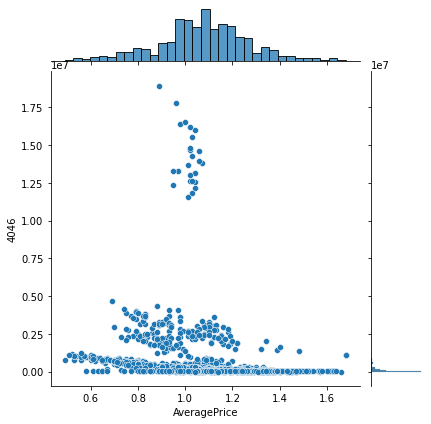

In [34]:
sns.jointplot(df1['AveragePrice'],df1['4046'])

The above figure shows more outliers

<AxesSubplot:xlabel='AveragePrice', ylabel='4225'>

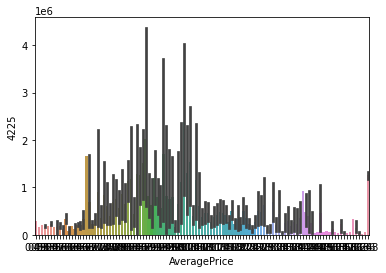

In [35]:
sns.barplot(df1['AveragePrice'],df1['4225'])

The above shows variations in the price

<AxesSubplot:xlabel='Total Bags', ylabel='count'>

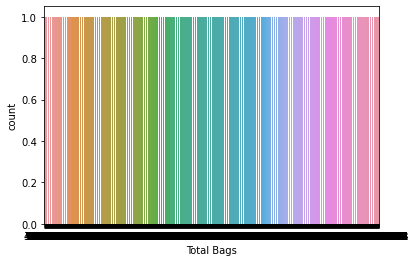

In [36]:
sns.countplot(x='Total Bags',data=df1)

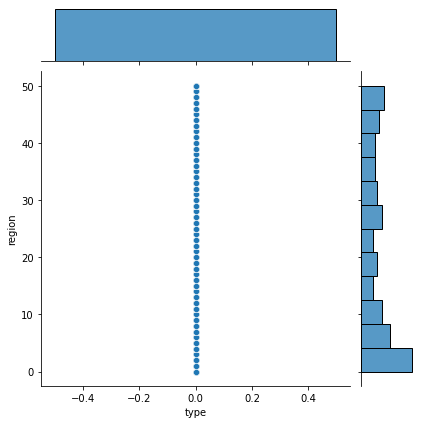

In [37]:
sns.jointplot(df1['type'],df1['region'])

From the visualizations we can proceed further 

# DATA CLENSING

In [38]:
df1.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,50.624918,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,30.040469,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,25.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,49.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,75.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,103.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In TotalVolume,4046,4770,TotalBags,SmallBags and LargeBags the mean is lesser than median denoting it is leftly skewed.

While in 4225,XLargeBags, type and region , it shows right skewed datas.

Most of variables shows much diff berween 75% and max which shows more outliers present.

# More Data Clensing

In [39]:
df1.corr()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.145600,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
Date,-0.145600,1.000000,0.092984,-0.024767,-0.020773,-0.035118,-0.016382,-0.010990,-0.005656,-0.040195,0.011274,NaN,0.022750,-0.026002
AveragePrice,-0.075531,0.092984,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.024767,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,0.092013,-0.020773,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.035118,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.016382,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.010990,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.005656,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.040195,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452


<AxesSubplot:>

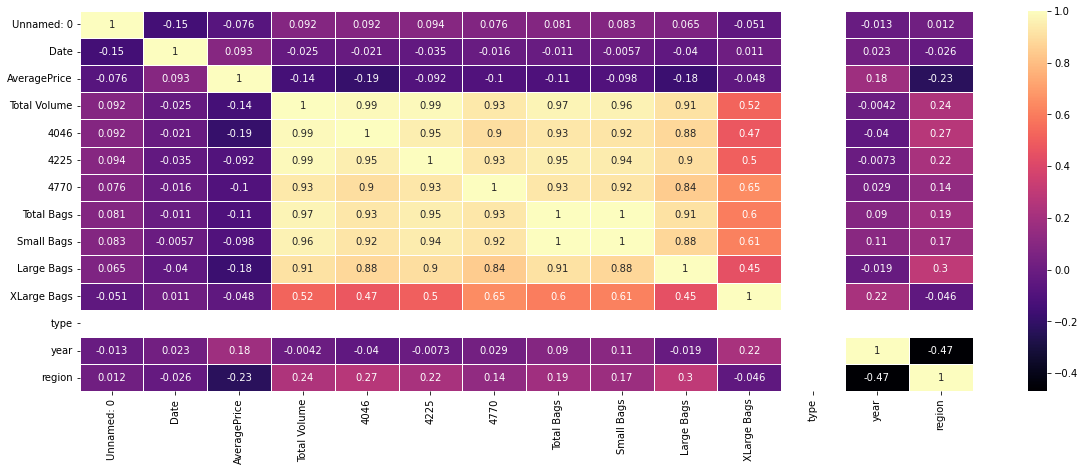

In [40]:
plt.figure(figsize=(20,7))
sns.heatmap(df1.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

It shows few collinearity present

In [41]:
df1.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

# REMOVING OUTLIERS

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [43]:
dfnew=df1[(z<3).all(axis=1)]

In [44]:
dfnew.skew()

Unnamed: 0     NaN
Date           NaN
AveragePrice   NaN
Total Volume   NaN
4046           NaN
4225           NaN
4770           NaN
Total Bags     NaN
Small Bags     NaN
Large Bags     NaN
XLarge Bags    NaN
type           NaN
year           NaN
region         NaN
dtype: float64

In [45]:
dfnew.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


SINCE ZSCORE REMOVES ALL DATA , IT IS NOT WORKING HERE, SO WE GO FOR IQR

In [46]:
from scipy import stats
IQR = stats.iqr(df1)
IQR

63427.6725

In [47]:
Q1 = df1.quantile()
Q3 = df1.quantile()
dfx = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
dfx.shape

(43, 14)

In [49]:
dfx.dtypes

Unnamed: 0      float64
Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year            float64
region          float64
dtype: object

In [50]:
dfx.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# SPLITTING X (INPUT VARAIABLE AND Y (OUTPUT VARIABLE))

In [51]:
x=dfx.drop(['AveragePrice'],axis=1)
y=dfx['AveragePrice']

In [52]:
x.shape

(43, 13)

In [53]:
y.shape

(43,)

# TRAINING AND TESTING 

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [55]:
maxR2=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=r2_score(y_test,predlr)
    print('R2_score of Linear Regression ' ,score,'at random_state ' ,i)
    if score>maxR2:
        maxR2=score
        maxRS=i
    print('Max r2_score of lr is ' ,maxR2 *100 ,'at random_state ',maxRS)    

R2_score of Linear Regression  -0.871921314584672 at random_state  0
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  -0.07364785733649537 at random_state  1
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  -1.5563429462594986 at random_state  2
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  -9.606563686888526 at random_state  3
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  -0.1625525673266004 at random_state  4
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  -1.1158463111777475 at random_state  5
Max r2_score of lr is  0 at random_state  0
R2_score of Linear Regression  0.656614909804418 at random_state  6
Max r2_score of lr is  65.6614909804418 at random_state  6
R2_score of Linear Regression  0.7356943103587517 at random_state  7
Max r2_score of lr is  73.56943103587517 at random_state  7
R2_score of Linear Regression  0.5609022554952507 at random_s

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=363)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=r2_score(y_test,predlr)
print('R2_score of LinearRegression ' ,score*100)
print(mean_squared_error(y_test,predlr))
print(mean_absolute_error(y_test,predlr))

R2_score of LinearRegression  95.17190142203393
0.0013422114046745671
0.02871028528338964


# TESTING VARIOUS MODELS

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
knr=KNeighborsRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
etr=ExtraTreesRegressor()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
svr=SVR()

In [58]:
model=[knr,gbr,abr,etr,rfr,dtr,svr]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('R2_score of model ' , i ,'is = ',r2_score(y_test,predi)*100)

R2_score of model  KNeighborsRegressor() is =  74.43005595523582
R2_score of model  GradientBoostingRegressor() is =  59.60869174247675
R2_score of model  AdaBoostRegressor() is =  71.32515846654648
R2_score of model  ExtraTreesRegressor() is =  79.96460831334919
R2_score of model  RandomForestRegressor() is =  69.29690647482016
R2_score of model  DecisionTreeRegressor() is =  53.71702637889692
R2_score of model  SVR() is =  81.3051440125158


# CROSS_VALIDATION

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
for i in range(2,10):
    models=[lr,knr,gbr,abr,etr,rfr,dtr,svr]
    for j in models:
        j.fit(x_train,y_train)
        predj=j.predict(x_test)
        score=r2_score(y_test,predj)
        cross=cross_val_score(j,x_train,y_train,cv=i)
        print('R2_score of model ' ,j, 'is equal = ', score*100)
        print('Cross validation of model ',i, 'is equal = ',cross.mean())
        print('Diff between r2_score and cross_validation of model ' ,j,'is equal = ',score-cross.mean())

R2_score of model  LinearRegression() is equal =  95.17190142203393
Cross validation of model  2 is equal =  -1.912615712506577
Diff between r2_score and cross_validation of model  LinearRegression() is equal =  2.8643347267269164
R2_score of model  KNeighborsRegressor() is equal =  74.43005595523582
Cross validation of model  2 is equal =  0.10776614906855947
Diff between r2_score and cross_validation of model  KNeighborsRegressor() is equal =  0.6365344104837987
R2_score of model  GradientBoostingRegressor() is equal =  58.59052610452422
Cross validation of model  2 is equal =  0.21738837078953327
Diff between r2_score and cross_validation of model  GradientBoostingRegressor() is equal =  0.36851689025570894
R2_score of model  AdaBoostRegressor() is equal =  67.32543687272405
Cross validation of model  2 is equal =  0.5148710707792439
Diff between r2_score and cross_validation of model  AdaBoostRegressor() is equal =  0.15838329794799666
R2_score of model  ExtraTreesRegressor() is eq

# From above we get to know that Linear Regression works best so we can try to regularise it more 

In [61]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
l=Lasso()
r=Ridge()
en=ElasticNet()

In [62]:
models=[l,r,en]
for i in models:
    i.fit(x_train,y_train)
    alpha=[0.001,0.001,0.01,0.1,1]
    for j in alpha:
        predmodel=i.predict(x_test)
        print('R2_score : ' ,(r2_score(y_test,predmodel))*100, 'at model ',i,'with alpha ',j)
        print(mean_squared_error(y_test,predmodel))
        print(mean_absolute_error(y_test,predmodel))

R2_score :  83.12053366144477 at model  Lasso() with alpha  0.001
0.004692491642118352
0.060855878690956405
R2_score :  83.12053366144477 at model  Lasso() with alpha  0.001
0.004692491642118352
0.060855878690956405
R2_score :  83.12053366144477 at model  Lasso() with alpha  0.01
0.004692491642118352
0.060855878690956405
R2_score :  83.12053366144477 at model  Lasso() with alpha  0.1
0.004692491642118352
0.060855878690956405
R2_score :  83.12053366144477 at model  Lasso() with alpha  1
0.004692491642118352
0.060855878690956405
R2_score :  94.50476432490301 at model  Ridge() with alpha  0.001
0.0015276755176769615
0.029507452781450158
R2_score :  94.50476432490301 at model  Ridge() with alpha  0.001
0.0015276755176769615
0.029507452781450158
R2_score :  94.50476432490301 at model  Ridge() with alpha  0.01
0.0015276755176769615
0.029507452781450158
R2_score :  94.50476432490301 at model  Ridge() with alpha  0.1
0.0015276755176769615
0.029507452781450158
R2_score :  94.50476432490301 at m

# From the above result we will finally tune the better models like Ridge, ExtraTreesRegressor,RandomForestRegressor and SVR for a final analysis

# HYPERTUNING

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
mod=[r,etr,rfr]
parameters={'n_estimators':[50,100,150,200],
            'criterion':['mae','mse'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}


In [65]:
gscvetr=GridSearchCV(estimator=etr,param_grid=parameters)
gscvetr.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [66]:
print(gscvetr.best_score_)
print(gscvetr.best_estimator_)
print(gscvetr.best_params_)

0.4481884742185233
ExtraTreesRegressor(criterion='mse', max_depth=3, max_features='auto',
                    n_estimators=200)
{'criterion': 'mse', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 200}


In [67]:
gscvrfr=GridSearchCV(estimator=rfr,param_grid=parameters)
gscvrfr.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mae', 'mse'], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [68]:
print(gscvrfr.best_score_)
print(gscvrfr.best_estimator_)
print(gscvrfr.best_params_)

0.41326400435698163
RandomForestRegressor(criterion='mse', max_depth=2, max_features='auto',
                      n_estimators=200)
{'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 200}


In [69]:
r=Ridge()
alpha_value={'alpha':[0.0001,0.001,0.01,0.1,1]}

In [70]:
gscv_r=GridSearchCV(estimator=r,param_grid=alpha_value)
gscv_r.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]})

In [71]:
print(gscv_r.best_score_)
print(gscv_r.best_estimator_)
print(gscv_r.best_params_)

-0.3713781439583303
Ridge(alpha=1)
{'alpha': 1}


In [72]:
svr=SVR()
kernel_value={'kernel':['rbf','linear','poly']}

In [73]:
gscv_svr=GridSearchCV(estimator=svr,param_grid=kernel_value)
gscv_svr.fit(x_train,y_train)

GridSearchCV(estimator=SVR(), param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [74]:
print(gscv_svr.best_score_)
print(gscv_svr.best_estimator_)
print(gscv_svr.best_params_)

-0.018499898028968408
SVR()
{'kernel': 'rbf'}


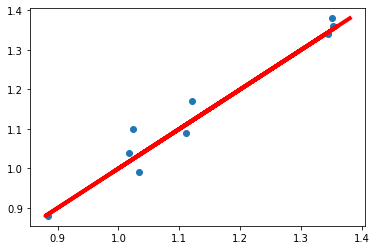

In [75]:
plt.scatter(predlr,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# From all the above analysis it is very clear that LinearRegression is the best fitted model

# SAVING THE BEST FITTED MODEL

In [76]:
import pickle

In [77]:
filename='Avocado.pkl'
pickle.dump(LinearRegression(),open(filename,'wb'))

In [78]:
pickle.load(open(filename,'rb'))

LinearRegression()